# Maharashtra's Comparison of Corporate and Non-Corporate Workers with past decade

Here, we take the data from Census of India, and make some comparisons about Maharashtra to draw inferences about the general trends about the changes that have occurred in the past decades

- Census website: https://censusindia.gov.in/
- Python 3.13.3

In [1057]:
import pandas as pd

## Importing Data

In [1058]:
# Import Data from Excel Sheets
age_workforce_91 = pd.read_excel('./dataset/1991-B01T-1400.xlsx', header=None)
age_workforce_01 = pd.read_excel('./dataset/2001-B-01_PC01_B01_27.xls', header=None)
age_workforce_11 = pd.read_excel('./dataset/2011_B-01-DDW-2700B-01-Census.xls', header=None)


# Preprocessing

### Fixing Column names and Row indices: The headers in the Excel sheet were renamed appropriately

After renaming the headers, we reset the index of the DataFrame for both imported files. This ensures that the DataFrame has proper row indices and column headings.

In [1059]:
# Naming Header rows

header_names_91 = [
    'Table_Name', 'State_Code', 'District_Code',
    'Area_Name', 'Total_Rural_Urban', 'Age_Group',
    'Population_Persons', 'Population_Males', 'Population_Females',
    'Main_Workers_Persons', 'Main_Workers_Males', 'Main_Workers_Females',
    'Marginal_0_to_6_Persons', 'Marginal_0_to_6_Males', 'Marginal_0_to_6_Females',
    'Non_Workers_Total_Persons', 'Non_Workers_Total_Males', 'Non_Workers_Total_Females',
    'Non_Workers_Seeking_Persons', 'Non_Workers_Seeking_Males', 'Non_Workers_Seeking_Females',
]


header_names_01 = [
    'Table_Name', 'State_Code', 'District_Code',
    'Area_Name', 'Total_Rural_Urban', 'Age_Group',
    'Population_Persons', 'Population_Males', 'Population_Females',
    'Main_Workers_Persons', 'Main_Workers_Males', 'Main_Workers_Females',
    'Marginal_0_to_6_Persons', 'Marginal_0_to_6_Males', 'Marginal_0_to_6_Females',
    'Marginal_Seeking_Persons', 'Marginal_Seeking_Males', 'Marginal_Seeking_Females',
    'Non_Workers_Total_Persons', 'Non_Workers_Total_Males', 'Non_Workers_Total_Females',
    'Non_Workers_Seeking_Persons', 'Non_Workers_Seeking_Males', 'Non_Workers_Seeking_Females',
]

header_names_11 = [
    'Table_Name', 'State_Code', 'District_Code',
    'Area_Name', 'Total_Rural_Urban', 'Age_Group',
    'Population_Persons', 'Population_Males', 'Population_Females',
    'Main_Workers_Persons', 'Main_Workers_Males', 'Main_Workers_Females',
    'Marginal_0_to_3_Persons', 'Marginal_0_to_3_Males', 'Marginal_0_to_3_Females',
    'Marginal_3_to_6_Persons', 'Marginal_3_to_6_Males', 'Marginal_3_to_6_Females',
    'Marginal_Seeking_Persons', 'Marginal_Seeking_Males', 'Marginal_Seeking_Females',
    'Non_Workers_Total_Persons', 'Non_Workers_Total_Males', 'Non_Workers_Total_Females',
    'Non_Workers_Seeking_Persons', 'Non_Workers_Seeking_Males', 'Non_Workers_Seeking_Females',
]

age_workforce_01.columns = header_names_01
age_workforce_01 = age_workforce_01.drop(index=range(0, 55))
age_workforce_01.reset_index(drop=True, inplace=True)
age_workforce_01.head(2)
print("Index of Workforce 2001: " + str(age_workforce_01.index))

age_workforce_11.columns = header_names_11
age_workforce_11 = age_workforce_11.drop(index=range(0, 56))
age_workforce_11.reset_index(drop=True, inplace=True)
age_workforce_11.head(2)
print("Index of Workforce 2011: " + str(age_workforce_11.index))

age_workforce_91.columns = header_names_91
age_workforce_91 = age_workforce_91.drop(index=range(0, 85))
age_workforce_91.reset_index(drop=True, inplace=True)
print("Index of Workforce 1991: " + str(age_workforce_91.index))
age_workforce_91.head(10)

Index of Workforce 2001: RangeIndex(start=0, stop=1680, step=1)
Index of Workforce 2011: RangeIndex(start=0, stop=1680, step=1)
Index of Workforce 1991: RangeIndex(start=0, stop=1755, step=1)


,Table_Name,State_Code,District_Code,Area_Name,Total_Rural_Urban,Age_Group,Population_Persons,Population_Males,Population_Females,Main_Workers_Persons,...,Main_Workers_Females,Marginal_0_to_6_Persons,Marginal_0_to_6_Males,Marginal_0_to_6_Females,Non_Workers_Total_Persons,Non_Workers_Total_Males,Non_Workers_Total_Females,Non_Workers_Seeking_Persons,Non_Workers_Seeking_Males,Non_Workers_Seeking_Females
0,B01T,14,01,District-Greater Bombay,Total,TOTAL,9925891,5460145,4465746,3434732,...,468650,64610,41250,23360,6426549,2452813,3973736,117807,66837,50970
1,B01T,14,01,District-Greater Bombay,Total,5-14,2006223,1042857,963366,25460,...,6650,2220,1350,870,1978543,1022697,955846,19330,10200,9130
2,B01T,14,01,District-Greater Bombay,Total,15-19,945925,523264,422661,175675,...,29311,8930,6020,2910,761320,370880,390440,24940,15430,9510
3,B01T,14,01,District-Greater Bombay,Total,20-24,1089173,614230,474943,490363,...,76003,15740,11330,4410,583070,188540,394530,32780,20950,11830
4,B01T,14,01,District-Greater Bombay,Total,25-29,1031851,567192,464659,587742,...,80570,9780,6470,3310,434329,53550,380779,15040,8550,6490
5,B01T,14,01,District-Greater Bombay,Total,30-34,863645,492355,371290,534545,...,69780,7010,4130,2880,322090,23460,298630,7380,3320,4060
6,B01T,14,01,District-Greater Bombay,Total,35-39,776200,438600,337600,485920,...,68490,6290,3240,3050,283990,17930,266060,4760,2180,2580
7,B01T,14,01,District-Greater Bombay,Total,40-49,1073802,632151,441651,681421,...,87420,8100,4360,3740,384281,33790,350491,6230,2790,3440
8,B01T,14,01,District-Greater Bombay,Total,50-59,637912,368556,269356,346126,...,38516,4090,2590,1500,287696,58356,229340,3217,1467,1750
9,B01T,14,01,District-Greater Bombay,Total,60-69,341210,183260,157950,82970,...,8710,1750,1270,480,256490,107730,148760,2170,1030,1140


### We strip the text of all whitespaces from both sides.

In [1060]:
for df in [age_workforce_91, age_workforce_01, age_workforce_11]:
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype(str).str.strip()

## Data Inconsistencies:

In both datasets, the top part had 'MAHARASHTRA' (2001) or 'State - Maharashtra' (2011) at the top.

2001 -  Area Names [Mumbai, Hingholi, Gondiya, Washim, Nandurbar] had * symbol. This has no significant difference, but it is mentioned nonetheless.

2011 - Marginal Workers got a detailed distinction : 0-3 months and 3-6 months. Since this separation is not present in the 2001 dataset, we will be merging this later.

2011 - Some entries have 0 values

Removing the asterisk in Area Names

In [1061]:
age_workforce_01['Area_Name'] = age_workforce_01['Area_Name'].str.replace('*', '', regex=False).str.strip().str.title()
age_workforce_11['Area_Name'] = age_workforce_11['Area_Name'].str.title()

The data now looks like this:

In [1062]:
age_workforce_91.head()

,Table_Name,State_Code,District_Code,Area_Name,Total_Rural_Urban,Age_Group,Population_Persons,Population_Males,Population_Females,Main_Workers_Persons,...,Main_Workers_Females,Marginal_0_to_6_Persons,Marginal_0_to_6_Males,Marginal_0_to_6_Females,Non_Workers_Total_Persons,Non_Workers_Total_Males,Non_Workers_Total_Females,Non_Workers_Seeking_Persons,Non_Workers_Seeking_Males,Non_Workers_Seeking_Females
0,B01T,14,01,District-Greater Bombay,Total,TOTAL,9925891,5460145,4465746,3434732,...,468650,64610,41250,23360,6426549,2452813,3973736,117807,66837,50970
1,B01T,14,01,District-Greater Bombay,Total,5-14,2006223,1042857,963366,25460,...,6650,2220,1350,870,1978543,1022697,955846,19330,10200,9130
2,B01T,14,01,District-Greater Bombay,Total,15-19,945925,523264,422661,175675,...,29311,8930,6020,2910,761320,370880,390440,24940,15430,9510
3,B01T,14,01,District-Greater Bombay,Total,20-24,1089173,614230,474943,490363,...,76003,15740,11330,4410,583070,188540,394530,32780,20950,11830
4,B01T,14,01,District-Greater Bombay,Total,25-29,1031851,567192,464659,587742,...,80570,9780,6470,3310,434329,53550,380779,15040,8550,6490


### There are no NULL values in data by this code, but there are 0 values for some entries which need to be removed

Checking for NULL values in the data

In [1063]:
# Checking for NULL Values
print('======================')
print(age_workforce_01.isna().sum())
print('======================')
print(age_workforce_01.info())
print('======================')
print(age_workforce_11.isna().sum())
print('======================')
print(age_workforce_11.info())
print('======================')

Table_Name                     0
State_Code                     0
District_Code                  0
Area_Name                      0
Total_Rural_Urban              0
Age_Group                      0
Population_Persons             0
Population_Males               0
Population_Females             0
Main_Workers_Persons           0
Main_Workers_Males             0
Main_Workers_Females           0
Marginal_0_to_6_Persons        0
Marginal_0_to_6_Males          0
Marginal_0_to_6_Females        0
Marginal_Seeking_Persons       0
Marginal_Seeking_Males         0
Marginal_Seeking_Females       0
Non_Workers_Total_Persons      0
Non_Workers_Total_Males        0
Non_Workers_Total_Females      0
Non_Workers_Seeking_Persons    0
Non_Workers_Seeking_Males      0
Non_Workers_Seeking_Females    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                    

### Column Dropping: Dropping irrelavant columns 

In [1064]:
# Dropping columns
columns_to_drop_91 = ['Table_Name', 'State_Code']
age_workforce_91.drop(columns=columns_to_drop_91, inplace=True)
age_workforce_91.reset_index(drop=True, inplace=True)

columns_to_drop_01 = ['Table_Name', 'State_Code']
age_workforce_01.drop(columns=columns_to_drop_01, inplace=True)
age_workforce_01.reset_index(drop=True, inplace=True)

columns_to_drop_11 = ['Table_Name', 'District_Code', 'State_Code']
age_workforce_11.drop(columns=columns_to_drop_11, inplace=True)
age_workforce_11.reset_index(drop=True, inplace=True)


### Creating District Codes consistent with 2001 and 2011

In [1065]:
import re

def extract_district_code(area_name):
    match = re.search(r'\((\d{2})\)\s*$', area_name)
    return int(match.group(1)) if match else None

age_workforce_11['District_Code'] = age_workforce_11['Area_Name'].apply(extract_district_code)


### Merged the columns in 2011 that it stays consistent with 2001
- Created the columns with same names as 2001 and then dropped the older columns after merge

In [1066]:
age_workforce_11['Marginal_0_to_6_Persons'] = (
    age_workforce_11['Marginal_0_to_3_Persons'].astype(int) +
    age_workforce_11['Marginal_3_to_6_Persons'].astype(int)
)

age_workforce_11['Marginal_0_to_6_Males'] = (
    age_workforce_11['Marginal_0_to_3_Males'].astype(int) +
    age_workforce_11['Marginal_3_to_6_Males'].astype(int)
)

age_workforce_11['Marginal_0_to_6_Females'] = (
    age_workforce_11['Marginal_0_to_3_Females'].astype(int) +
    age_workforce_11['Marginal_3_to_6_Females'].astype(int)
)

age_workforce_11.drop(columns=[
    'Marginal_0_to_3_Persons', 'Marginal_0_to_3_Males', 'Marginal_0_to_3_Females',
    'Marginal_3_to_6_Persons', 'Marginal_3_to_6_Males', 'Marginal_3_to_6_Females'
], inplace=True)

## Row Dropping
- Rows that contained additional data were removed (Rows such as Total, 15-60, 60+) -> These were derived from other data inside the file

Removing additional data in the Dataset

In [1067]:
# Row dropping

#  Drop rows where 'Total_Rural_Urban' is 'Total' or 'City U.A.'
age_workforce_91 = age_workforce_91[age_workforce_91['Total_Rural_Urban'] != 'Total']
age_workforce_91 = age_workforce_91[age_workforce_91['Total_Rural_Urban'] != 'City/U.A.']

#  Drop rows where 'Total_Rural_Urban' is 'Total'
age_workforce_01 = age_workforce_01[age_workforce_01['Total_Rural_Urban'] != 'Total']
age_workforce_11 = age_workforce_11[age_workforce_11['Total_Rural_Urban'] != 'Total']

#  Drop rows where 'Area_Name' is 'State - MAHARASHTRA (27)'
age_workforce_91 = age_workforce_91[age_workforce_91['Area_Name'] != 'State-Maharashtra']
age_workforce_01 = age_workforce_01[age_workforce_01['Area_Name'] != 'MAHARASHTRA']
age_workforce_11 = age_workforce_11[age_workforce_11['Area_Name'] != 'State - MAHARASHTRA (27)']

# Drop rows where 'Age_Group' is one of ['15-59', '60+', 'Total']
age_groups_to_drop = ['15-59', '60+', 'Total', 'TOTAL', 'A.N.S', 'A.N.S.', 'Age not stated']
age_workforce_91 = age_workforce_91[~age_workforce_91['Age_Group'].isin(age_groups_to_drop)]
age_workforce_01 = age_workforce_01[~age_workforce_01['Age_Group'].isin(age_groups_to_drop)]
age_workforce_11 = age_workforce_11[~age_workforce_11['Age_Group'].isin(age_groups_to_drop)]

In [1068]:
age_workforce_91

,District_Code,Area_Name,Total_Rural_Urban,Age_Group,Population_Persons,Population_Males,Population_Females,Main_Workers_Persons,Main_Workers_Males,Main_Workers_Females,Marginal_0_to_6_Persons,Marginal_0_to_6_Males,Marginal_0_to_6_Females,Non_Workers_Total_Persons,Non_Workers_Total_Males,Non_Workers_Total_Females,Non_Workers_Seeking_Persons,Non_Workers_Seeking_Males,Non_Workers_Seeking_Females
16,01,District-Greater Bombay,Urban,5-14,2006223,1042857,963366,25460,18810,6650,2220,1350,870,1978543,1022697,955846,19330,10200,9130
17,01,District-Greater Bombay,Urban,15-19,945925,523264,422661,175675,146364,29311,8930,6020,2910,761320,370880,390440,24940,15430,9510
18,01,District-Greater Bombay,Urban,20-24,1089173,614230,474943,490363,414360,76003,15740,11330,4410,583070,188540,394530,32780,20950,11830
19,01,District-Greater Bombay,Urban,25-29,1031851,567192,464659,587742,507172,80570,9780,6470,3310,434329,53550,380779,15040,8550,6490
20,01,District-Greater Bombay,Urban,30-34,863645,492355,371290,534545,464765,69780,7010,4130,2880,322090,23460,298630,7380,3320,4060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,30,District-Gadchiroli,Urban,40-49,6562,3540,3022,4732,3490,1242,150,0,150,1680,50,1630,0,0,0
1748,30,District-Gadchiroli,Urban,50-59,3302,1680,1622,2042,1430,612,150,20,130,1110,230,880,0,0,0
1749,30,District-Gadchiroli,Urban,60-69,2122,1072,1050,810,590,220,129,9,120,1183,473,710,0,0,0
1750,30,District-Gadchiroli,Urban,70-79,920,410,510,250,190,60,20,10,10,650,210,440,10,0,10


Removing missing data (many '0's in the rows, eg. Mumbai (Suburban) -> Rural)

In [1069]:
cleaned_dfs = []

for df in [age_workforce_91, age_workforce_11, age_workforce_01]: 
    df = df.copy()  # avoid side-effects on original
    
    id_columns = ['District_Code', 'Area_Name', 'Total_Rural_Urban', 'Age_Group']
    numeric_columns = [col for col in df.columns if col not in id_columns]

    # Strip commas and whitespace from stringified numbers if any
    for col in numeric_columns:
        df[col] = df[col].astype(str).str.replace(',', '').str.strip()
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

    df['District_Code'] = pd.to_numeric(df['District_Code'], errors='coerce').fillna(0).astype(int)

    # Remove rows where 80%+ of numeric values are zero
    df['zero_count'] = (df[numeric_columns] == 0).sum(axis=1)
    threshold = int(0.8 * len(numeric_columns))
    df = df[df['zero_count'] <= threshold].copy()

    df.drop(columns='zero_count', inplace=True)
    cleaned_dfs.append(df)

# Unpack cleaned DataFrames
age_workforce_91, age_workforce_11, age_workforce_01 = cleaned_dfs

################ Resetting Index ##############
age_workforce_91.reset_index(drop=True, inplace=True)
age_workforce_01.reset_index(drop=True, inplace=True)
age_workforce_11.reset_index(drop=True, inplace=True)


## Label Encoding String Columns

In [1070]:
from sklearn.preprocessing import LabelEncoder

In [1071]:
age_workforce_91['Area_Name'].unique()

array(['District-Greater Bombay', 'District-Thane', 'District-Raigarh',
       'District-Ratnagiri', 'District-Sindhudurg', 'District-Nashik',
       'District-Dhule', 'District-Jalgaon', 'District-Ahmadnagar',
       'District-Pune', 'District-Satara', 'District-Sangli',
       'District-Solapur', 'District-Kolhapur', 'District-Aurangabad',
       'District-Jalna', 'District-Parbhani', 'District-Bid',
       'District-Nanded', 'District-Osmanabad', 'District-Latur',
       'District-Buldana', 'District-Akola', 'District-Amravati',
       'District-Yavatmal', 'District-Wardha', 'District-Nagpur',
       'District-Bhandara', 'District-Chandrapur', 'District-Gadchiroli'],
      dtype=object)

In [1072]:
columns_to_encode = ['Total_Rural_Urban', 'Age_Group', 'Area_Name']
encoders = {}

for col in columns_to_encode:
    # Encode and store for 1991
    le_91 = LabelEncoder()
    age_workforce_91[col] = le_91.fit_transform(age_workforce_91[col])
    encoders[f'{col}_91'] = le_91
    print(f"\n1991 - Mappings for column '{col}':")
    for i, label in enumerate(le_91.classes_):
        print(f"  {label} -> {i}")

    # Encode and store for 2001
    le_01 = LabelEncoder()
    age_workforce_01[col] = le_01.fit_transform(age_workforce_01[col])
    encoders[f'{col}_01'] = le_01
    print(f"\n2001 - Mappings for column '{col}':")
    for i, label in enumerate(le_01.classes_):
        print(f"  {label} -> {i}")

    # Encode and store for 2011
    le_11 = LabelEncoder()
    age_workforce_11[col] = le_11.fit_transform(age_workforce_11[col])
    encoders[f'{col}_11'] = le_11
    print(f"\n2011 - Mappings for column '{col}':")
    for i, label in enumerate(le_11.classes_):
        print(f"  {label} -> {i}")



1991 - Mappings for column 'Total_Rural_Urban':
  Rural -> 0
  Urban -> 1

2001 - Mappings for column 'Total_Rural_Urban':
  Rural -> 0
  Urban -> 1

2011 - Mappings for column 'Total_Rural_Urban':
  Rural -> 0
  Urban -> 1

1991 - Mappings for column 'Age_Group':
  15-19 -> 0
  20-24 -> 1
  25-29 -> 2
  30-34 -> 3
  35-39 -> 4
  40-49 -> 5
  5-14 -> 6
  50-59 -> 7
  60-69 -> 8
  70-79 -> 9
  80+ -> 10

2001 - Mappings for column 'Age_Group':
  10-14 -> 0
  15-19 -> 1
  20-24 -> 2
  25-29 -> 3
  30-34 -> 4
  35-39 -> 5
  40-49 -> 6
  5-9 -> 7
  50-59 -> 8
  60-69 -> 9
  70-79 -> 10
  80+ -> 11

2011 - Mappings for column 'Age_Group':
  10-14 -> 0
  15-19 -> 1
  20-24 -> 2
  25-29 -> 3
  30-34 -> 4
  35-39 -> 5
  40-49 -> 6
  5-9 -> 7
  50-59 -> 8
  60-69 -> 9
  70-79 -> 10
  80+ -> 11

1991 - Mappings for column 'Area_Name':
  District-Ahmadnagar -> 0
  District-Akola -> 1
  District-Amravati -> 2
  District-Aurangabad -> 3
  District-Bhandara -> 4
  District-Bid -> 5
  District-Bulda

## Reordering columns to same order

In [1073]:
# past_column_order = age_workforce_91.columns.tolist()

# age_workforce_01 = age_workforce_01[past_column_order]

# # Get correct column order from 2001
# correct_column_order = age_workforce_01.columns.tolist()

# # # Ensure 'District_Code' exists in 2011 DataFrame
# # if 'District_Code' not in age_workforce_11.columns:
# #     age_workforce_11['District_Code'] = -1  # or fill appropriately

# # Reorder 2011 columns to match 2001
# age_workforce_11 = age_workforce_11[correct_column_order]

In [1074]:
age_workforce_91.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   District_Code                649 non-null    int64
 1   Area_Name                    649 non-null    int64
 2   Total_Rural_Urban            649 non-null    int64
 3   Age_Group                    649 non-null    int64
 4   Population_Persons           649 non-null    int64
 5   Population_Males             649 non-null    int64
 6   Population_Females           649 non-null    int64
 7   Main_Workers_Persons         649 non-null    int64
 8   Main_Workers_Males           649 non-null    int64
 9   Main_Workers_Females         649 non-null    int64
 10  Marginal_0_to_6_Persons      649 non-null    int64
 11  Marginal_0_to_6_Males        649 non-null    int64
 12  Marginal_0_to_6_Females      649 non-null    int64
 13  Non_Workers_Total_Persons    649 non-null    int64

In [1075]:
age_workforce_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   District_Code                816 non-null    int64
 1   Area_Name                    816 non-null    int64
 2   Total_Rural_Urban            816 non-null    int64
 3   Age_Group                    816 non-null    int64
 4   Population_Persons           816 non-null    int64
 5   Population_Males             816 non-null    int64
 6   Population_Females           816 non-null    int64
 7   Main_Workers_Persons         816 non-null    int64
 8   Main_Workers_Males           816 non-null    int64
 9   Main_Workers_Females         816 non-null    int64
 10  Marginal_0_to_6_Persons      816 non-null    int64
 11  Marginal_0_to_6_Males        816 non-null    int64
 12  Marginal_0_to_6_Females      816 non-null    int64
 13  Marginal_Seeking_Persons     816 non-null    int64

In [1076]:
age_workforce_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Area_Name                    816 non-null    int64
 1   Total_Rural_Urban            816 non-null    int64
 2   Age_Group                    816 non-null    int64
 3   Population_Persons           816 non-null    int64
 4   Population_Males             816 non-null    int64
 5   Population_Females           816 non-null    int64
 6   Main_Workers_Persons         816 non-null    int64
 7   Main_Workers_Males           816 non-null    int64
 8   Main_Workers_Females         816 non-null    int64
 9   Marginal_Seeking_Persons     816 non-null    int64
 10  Marginal_Seeking_Males       816 non-null    int64
 11  Marginal_Seeking_Females     816 non-null    int64
 12  Non_Workers_Total_Persons    816 non-null    int64
 13  Non_Workers_Total_Males      816 non-null    int64

# Data Visualisation

## Importing Libraies

In [1077]:
age_workforce_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Area_Name                    816 non-null    int64
 1   Total_Rural_Urban            816 non-null    int64
 2   Age_Group                    816 non-null    int64
 3   Population_Persons           816 non-null    int64
 4   Population_Males             816 non-null    int64
 5   Population_Females           816 non-null    int64
 6   Main_Workers_Persons         816 non-null    int64
 7   Main_Workers_Males           816 non-null    int64
 8   Main_Workers_Females         816 non-null    int64
 9   Marginal_Seeking_Persons     816 non-null    int64
 10  Marginal_Seeking_Males       816 non-null    int64
 11  Marginal_Seeking_Females     816 non-null    int64
 12  Non_Workers_Total_Persons    816 non-null    int64
 13  Non_Workers_Total_Males      816 non-null    int64

In [1078]:
age_workforce_11.head(5)

,Area_Name,Total_Rural_Urban,Age_Group,Population_Persons,Population_Males,Population_Females,Main_Workers_Persons,Main_Workers_Males,Main_Workers_Females,Marginal_Seeking_Persons,...,Non_Workers_Total_Persons,Non_Workers_Total_Males,Non_Workers_Total_Females,Non_Workers_Seeking_Persons,Non_Workers_Seeking_Males,Non_Workers_Seeking_Females,District_Code,Marginal_0_to_6_Persons,Marginal_0_to_6_Males,Marginal_0_to_6_Females
0,20,0,7,163846,84016,79830,4100,2113,1987,280,...,158270,81187,77083,1134,555,579,1,1476,716,760
1,20,0,0,169724,87280,82444,12465,6176,6289,1803,...,150661,78226,72435,2165,1185,980,1,6598,2878,3720
2,20,0,1,143816,73032,70784,45187,22859,22328,7184,...,82569,43677,38892,8605,4870,3735,1,16060,6496,9564
3,20,0,2,122491,59942,62549,72419,38718,33701,8641,...,32232,14722,17510,6509,3738,2771,1,17840,6502,11338
4,20,0,3,102623,51639,50984,73859,42786,31073,6491,...,14595,3937,10658,2688,1295,1393,1,14169,4916,9253


In [1079]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

## Chart 1: Total Workers in Maharashtra (2001 vs 2011)

- Maharashtra had an expanding workforce (49,248,188 in 2011 as compared to 41,130,816 in 2001 - Shows an increase of 8,117,372 workers (~80 lakh workers))
- This could be due to population growth, increased economic activity, or better enumeration.

33879336
41130816
49248188


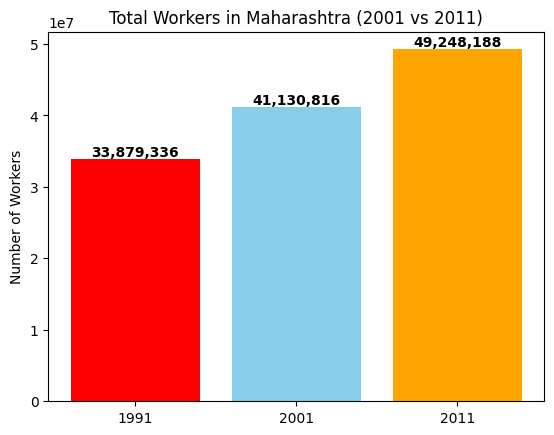

In [1080]:
# Total workers (main + marginal) per year

total_1991 = age_workforce_91['Main_Workers_Persons'].sum() + age_workforce_91['Marginal_0_to_6_Persons'].sum()
total_2001 = age_workforce_01['Main_Workers_Persons'].sum() + age_workforce_01['Marginal_0_to_6_Persons'].sum()
total_2011 = age_workforce_11['Main_Workers_Persons'].sum() + age_workforce_11['Marginal_0_to_6_Persons'].sum()

print(total_1991)
print(total_2001)
print(total_2011)

bars = plt.bar(['1991', '2001', '2011'], [total_1991, total_2001, total_2011], color=['red', 'skyblue', 'orange'])
plt.title('Total Workers in Maharashtra (2001 vs 2011)')
plt.ylabel('Number of Workers')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

## Worker Composition: 2001 vs 2011
This stacked bar chart shows how the entire population is distributed among:

- Main workers
- Marginal workers
- Non-workers

It allows a proportional comparison between these three categories across the two census years.

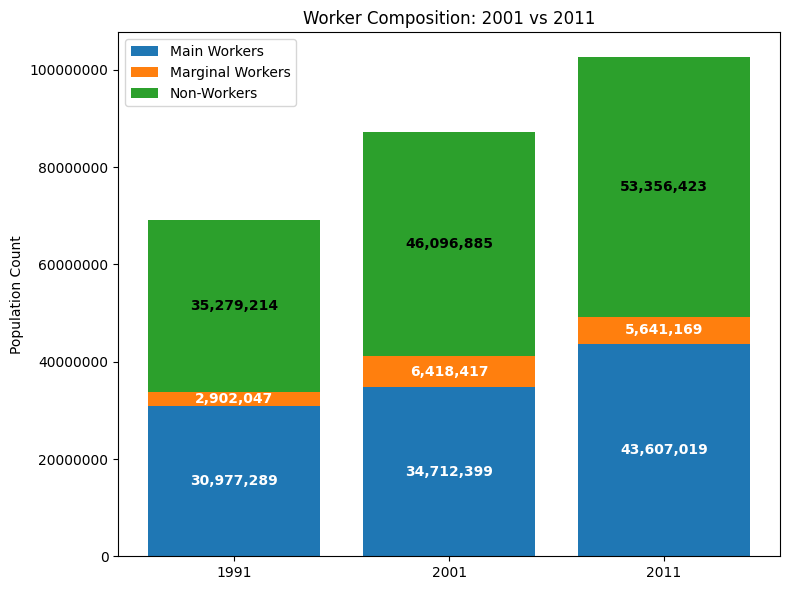

In [1081]:
# Combine data by summing relevant fields
main = [age_workforce_91['Main_Workers_Persons'].sum(), age_workforce_01['Main_Workers_Persons'].sum(), age_workforce_11['Main_Workers_Persons'].sum()]
marginal = [age_workforce_91['Marginal_0_to_6_Persons'].sum(), age_workforce_01['Marginal_0_to_6_Persons'].sum(), age_workforce_11['Marginal_0_to_6_Persons'].sum()]
non = [age_workforce_91['Non_Workers_Total_Persons'].sum(), age_workforce_01['Non_Workers_Total_Persons'].sum(), age_workforce_11['Non_Workers_Total_Persons'].sum()]
years = ['1991', '2001', '2011']

fig, ax = plt.subplots(figsize=(8, 6))

bars_main = ax.bar(years, main, label='Main Workers')
bars_marginal = ax.bar(years, marginal, bottom=main, label='Marginal Workers')
bars_non = ax.bar(years, non, bottom=[i+j for i,j in zip(main, marginal)], label='Non-Workers')

for i in range(len(years)):
    ax.text(i, main[i]/2, f'{main[i]:,}', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    ax.text(i, main[i] + marginal[i]/2, f'{marginal[i]:,}', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    ax.text(i, main[i] + marginal[i] + non[i]/2, f'{non[i]:,}', ha='center', va='center', color='black', fontsize=10, fontweight='bold')

ax.ticklabel_format(style='plain', axis='y')
for label in ax.get_yticklabels():
    label.set_fontsize(10)

ax.set_title('Worker Composition: 2001 vs 2011')
ax.set_ylabel('Population Count')
ax.legend()
plt.tight_layout()
plt.show()


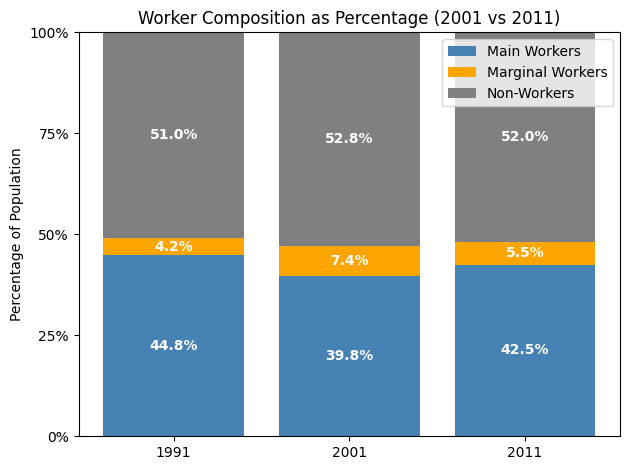

In [1082]:
# Step 1: Get raw values
main = [age_workforce_91['Main_Workers_Persons'].sum(), age_workforce_01['Main_Workers_Persons'].sum(), age_workforce_11['Main_Workers_Persons'].sum()]
marginal = [age_workforce_91['Marginal_0_to_6_Persons'].sum(), age_workforce_01['Marginal_0_to_6_Persons'].sum(), age_workforce_11['Marginal_0_to_6_Persons'].sum()]
non = [age_workforce_91['Non_Workers_Total_Persons'].sum(), age_workforce_01['Non_Workers_Total_Persons'].sum(), age_workforce_11['Non_Workers_Total_Persons'].sum()]
years = ['1991', '2001', '2011']

# Step 2: Convert to percentages
totals = [main[i] + marginal[i] + non[i] for i in range(3)]
main_pct = [main[i] / totals[i] for i in range(3)]
marginal_pct = [marginal[i] / totals[i] for i in range(3)]
non_pct = [non[i] / totals[i] for i in range(3)]

# Step 3: Plot normalized stacked bar chart
bars_main = plt.bar(years, main_pct, label='Main Workers', color='steelblue')
bars_marginal = plt.bar(years, marginal_pct, bottom=main_pct, label='Marginal Workers', color='orange')
bars_non = plt.bar(years, non_pct, bottom=[main_pct[i] + marginal_pct[i] for i in range(3)], label='Non-Workers', color='gray')

# Step 4: Add percentage labels in center of bars
for i in range(3):
    plt.text(i, main_pct[i]/2, f'{main_pct[i]*100:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    plt.text(i, main_pct[i] + marginal_pct[i]/2, f'{marginal_pct[i]*100:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    plt.text(i, main_pct[i] + marginal_pct[i] + non_pct[i]/2, f'{non_pct[i]*100:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Formatting
plt.title('Worker Composition as Percentage (2001 vs 2011)')
plt.ylabel('Percentage of Population')
plt.ylim(0, 1)
plt.yticks([0, 0.25, 0.5, 0.75, 1], ['0%', '25%', '50%', '75%', '100%'])
plt.legend()
plt.tight_layout()
plt.show()


### Gender Disparity in Workforce (2001 vs 2011)

This grouped bar chart compares male and female participation in three categories—Main Workers, Marginal Workers, and Non-Workers—for Maharashtra in 2001 and 2011. It shows:

* Total counts of males and females in each category for both years.
* Gender gaps in workforce participation.
* Changes in male and female workforce distribution over the decade.

The color-coded bars make it easy to compare gender differences within and across years.


In [1083]:
age_workforce_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   District_Code                816 non-null    int64
 1   Area_Name                    816 non-null    int64
 2   Total_Rural_Urban            816 non-null    int64
 3   Age_Group                    816 non-null    int64
 4   Population_Persons           816 non-null    int64
 5   Population_Males             816 non-null    int64
 6   Population_Females           816 non-null    int64
 7   Main_Workers_Persons         816 non-null    int64
 8   Main_Workers_Males           816 non-null    int64
 9   Main_Workers_Females         816 non-null    int64
 10  Marginal_0_to_6_Persons      816 non-null    int64
 11  Marginal_0_to_6_Males        816 non-null    int64
 12  Marginal_0_to_6_Females      816 non-null    int64
 13  Marginal_Seeking_Persons     816 non-null    int64

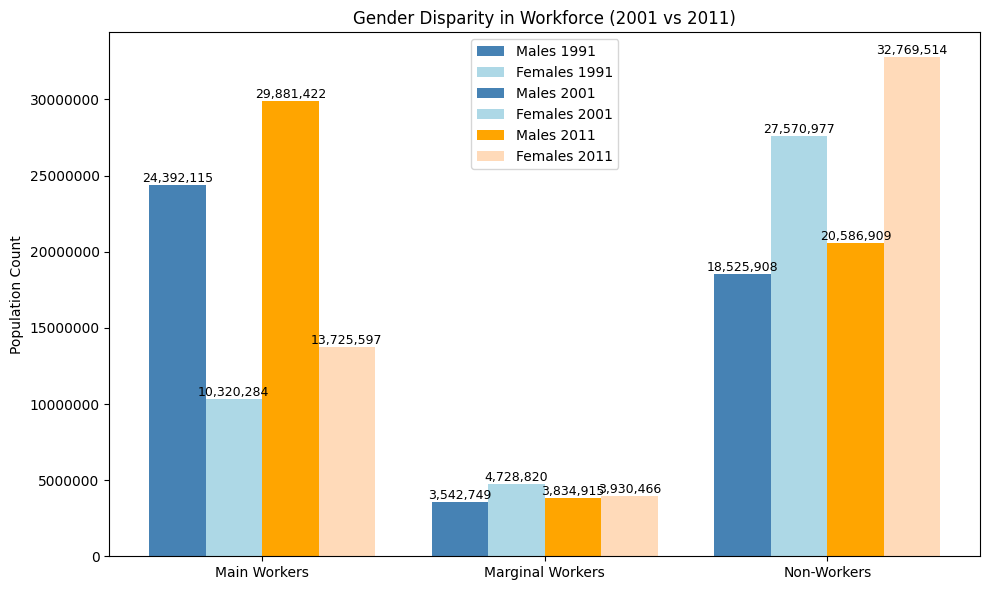

In [1084]:
# Define workforce categories
categories = ['Main Workers', 'Marginal Workers', 'Non-Workers']
x = np.arange(len(categories))
width = 0.2

male_91 = [
    age_workforce_91['Main_Workers_Males'].sum(),
    age_workforce_91['Marginal_0_to_6_Males'].sum(),
    age_workforce_91['Non_Workers_Total_Males'].sum()
]

female_91 = [
    age_workforce_91['Main_Workers_Females'].sum(),
    age_workforce_91['Marginal_0_to_6_Females'].sum(),
    age_workforce_91['Non_Workers_Total_Females'].sum()
]


male_01 = [
    age_workforce_01['Main_Workers_Males'].sum(),
    age_workforce_01['Marginal_0_to_6_Males'].sum() + age_workforce_01['Marginal_Seeking_Males'].sum(),
    age_workforce_01['Non_Workers_Total_Males'].sum()
]

female_01 = [
    age_workforce_01['Main_Workers_Females'].sum(),
    age_workforce_01['Marginal_0_to_6_Females'].sum() + age_workforce_01['Marginal_Seeking_Females'].sum(),
    age_workforce_01['Non_Workers_Total_Females'].sum()
]

male_11 = [
    age_workforce_11['Main_Workers_Males'].sum(),
    age_workforce_11['Marginal_0_to_6_Males'].sum() + age_workforce_11['Marginal_Seeking_Males'].sum(),
    age_workforce_11['Non_Workers_Total_Males'].sum()
]

female_11 = [
    age_workforce_11['Main_Workers_Females'].sum(),
    age_workforce_11['Marginal_0_to_6_Females'].sum() + age_workforce_11['Marginal_Seeking_Females'].sum(),
    age_workforce_11['Non_Workers_Total_Females'].sum()
]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bars_male_91 = ax.bar(x - width*1.5, male_91, width, label='Males 1991', color='steelblue')
bars_female_91 = ax.bar(x - width/2, female_91, width, label='Females 1991', color='lightblue')
bars_male_01 = ax.bar(x - width*1.5, male_01, width, label='Males 2001', color='steelblue')
bars_female_01 = ax.bar(x - width/2, female_01, width, label='Females 2001', color='lightblue')
bars_male_11 = ax.bar(x + width/2, male_11, width, label='Males 2011', color='orange')
bars_female_11 = ax.bar(x + width*1.5, female_11, width, label='Females 2011', color='peachpuff')

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:,}', 
                ha='center', va='bottom', fontsize=9)

for bars in [bars_male_01, bars_female_01, bars_male_11, bars_female_11]:
    add_labels(bars)

ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylabel('Population Count')
ax.set_title('Gender Disparity in Workforce (2001 vs 2011)')
ax.legend()
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()


### Age Group Workforce Composition (2001 & 2011)

- This line plot shows the distribution of **Main Workers**, **Marginal Workers**, and **Non-Workers** across different age groups for the years 2001 and 2011.
- It helps identify which age groups contribute most to each workforce category and observe changes over the decade.


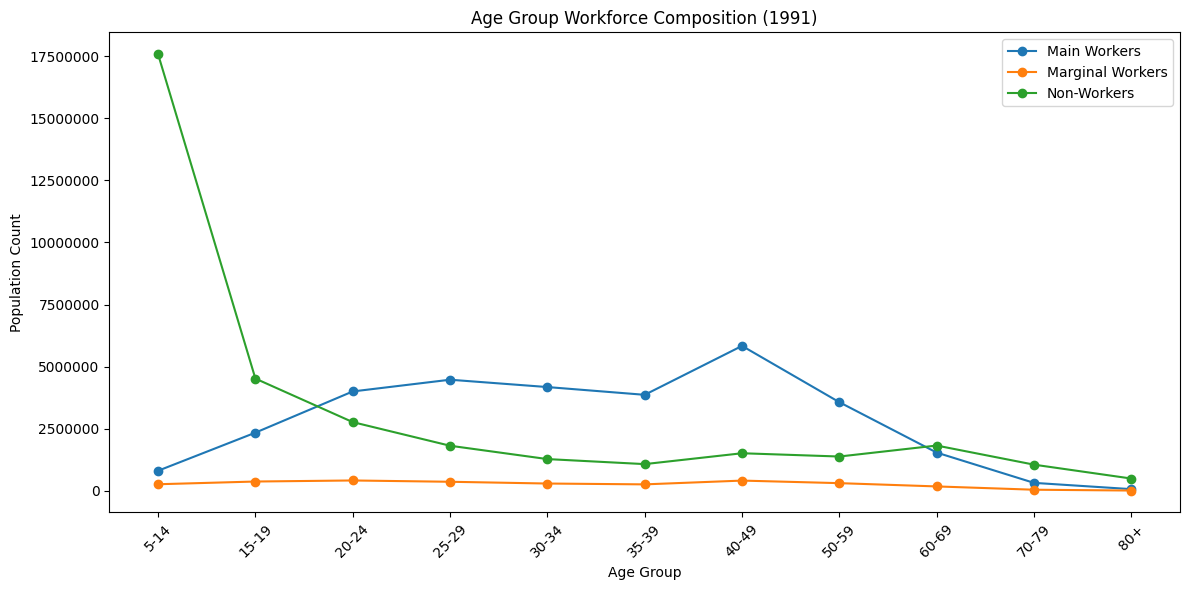

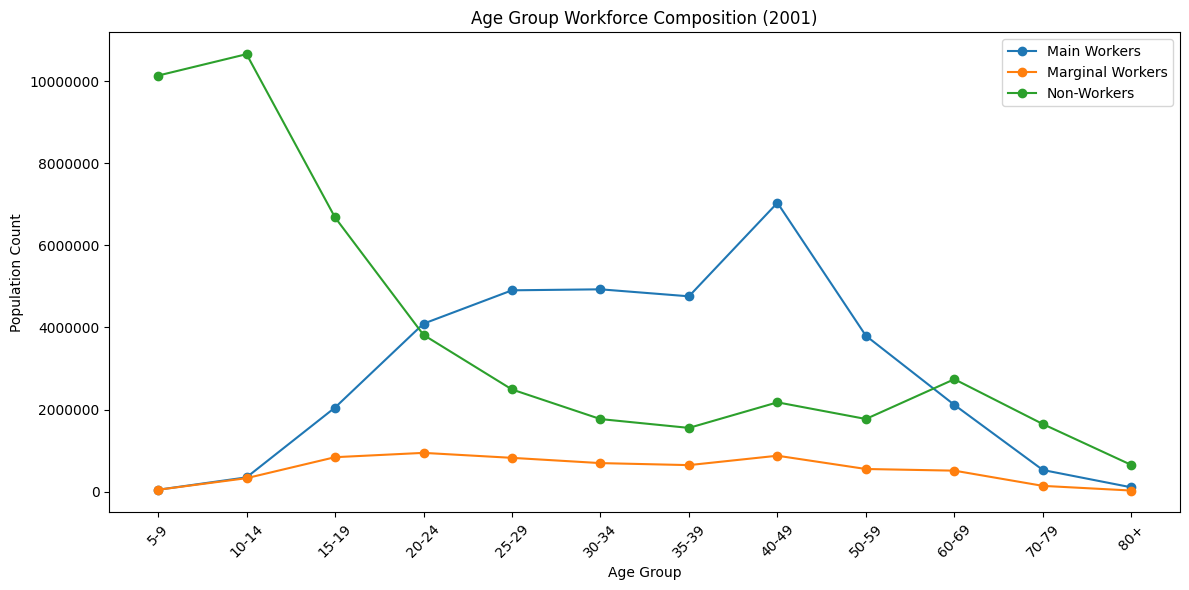

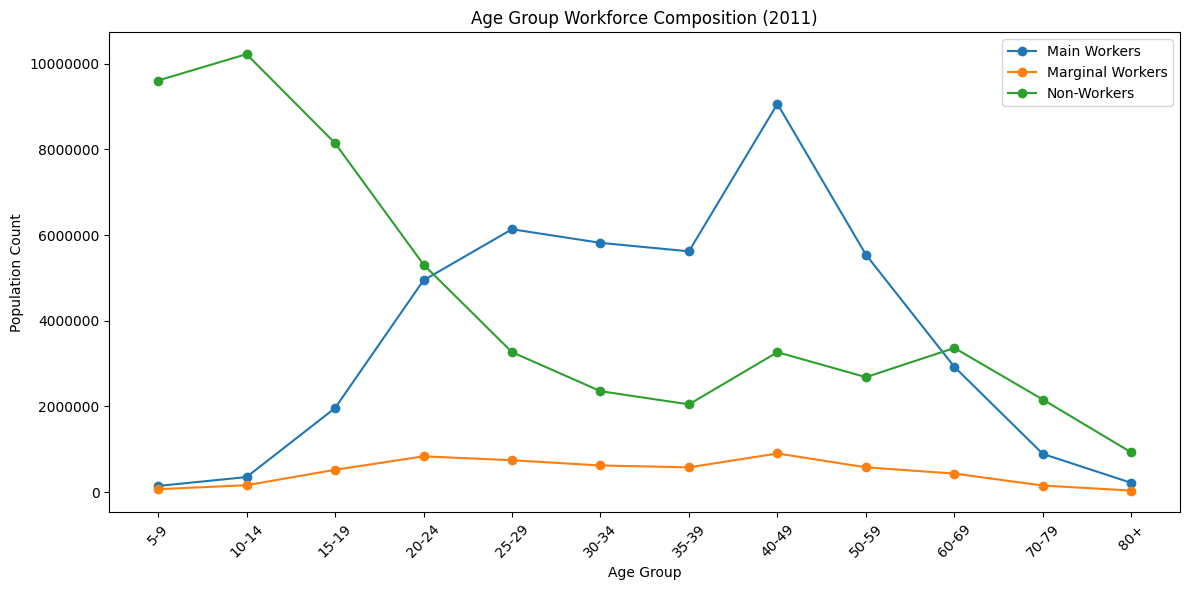

In [1085]:
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt

# Function to extract starting age
def extract_start_age(label):
    if '+' in label:
        return int(label.replace('+', ''))
    else:
        return int(label.split('-')[0])

# Plotting function
def plot_age_group(df, year, encoded_sorted, decoded_sorted):
    main = df.groupby('Age_Group')['Main_Workers_Persons'].sum().reindex(encoded_sorted)
    marginal = df.groupby('Age_Group')['Marginal_0_to_6_Persons'].sum().reindex(encoded_sorted)
    non = df.groupby('Age_Group')['Non_Workers_Total_Persons'].sum().reindex(encoded_sorted)

    plt.figure(figsize=(12,6))
    plt.plot(decoded_sorted, main, marker='o', label='Main Workers')
    plt.plot(decoded_sorted, marginal, marker='o', label='Marginal Workers')
    plt.plot(decoded_sorted, non, marker='o', label='Non-Workers')
    plt.xticks(rotation=45)
    plt.title(f'Age Group Workforce Composition ({year})')
    plt.xlabel('Age Group')
    plt.ylabel('Population Count')

    ax = plt.gca()
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
    ax.ticklabel_format(style='plain', axis='y')

    plt.legend()
    plt.tight_layout()
    plt.show()

# ---------- For 1991 ----------
le_age_91 = encoders['Age_Group_91']
encoded_91 = age_workforce_91['Age_Group'].unique()
decoded_91 = le_age_91.inverse_transform(encoded_91)
sorted_91 = sorted(zip(encoded_91, decoded_91), key=lambda x: extract_start_age(x[1]))
encoded_91_sorted, decoded_91_sorted = zip(*sorted_91)

# ---------- For 2001 ----------
le_age_01 = encoders['Age_Group_01']
encoded_01 = age_workforce_01['Age_Group'].unique()
decoded_01 = le_age_01.inverse_transform(encoded_01)
sorted_01 = sorted(zip(encoded_01, decoded_01), key=lambda x: extract_start_age(x[1]))
encoded_01_sorted, decoded_01_sorted = zip(*sorted_01)

# ---------- For 2011 ----------
le_age_11 = encoders['Age_Group_11']
encoded_11 = age_workforce_11['Age_Group'].unique()
decoded_11 = le_age_11.inverse_transform(encoded_11)
sorted_11 = sorted(zip(encoded_11, decoded_11), key=lambda x: extract_start_age(x[1]))
encoded_11_sorted, decoded_11_sorted = zip(*sorted_11)

# ---------- Plot All ----------
plot_age_group(age_workforce_91, 1991, encoded_91_sorted, decoded_91_sorted)
plot_age_group(age_workforce_01, 2001, encoded_01_sorted, decoded_01_sorted)
plot_age_group(age_workforce_11, 2011, encoded_11_sorted, decoded_11_sorted)


### TODO: Workforce Categories by Rural and Urban Areas (2011)

This bar plot compares the population counts across different workforce categories —

- **Main Workers**
- **Marginal Workers**
- **Non-Workers**
- **Non-Workers Seeking Work**

— separately for rural and urban areas in 2011.

It highlights differences in employment patterns and job-seeking behavior between rural and urban populations.


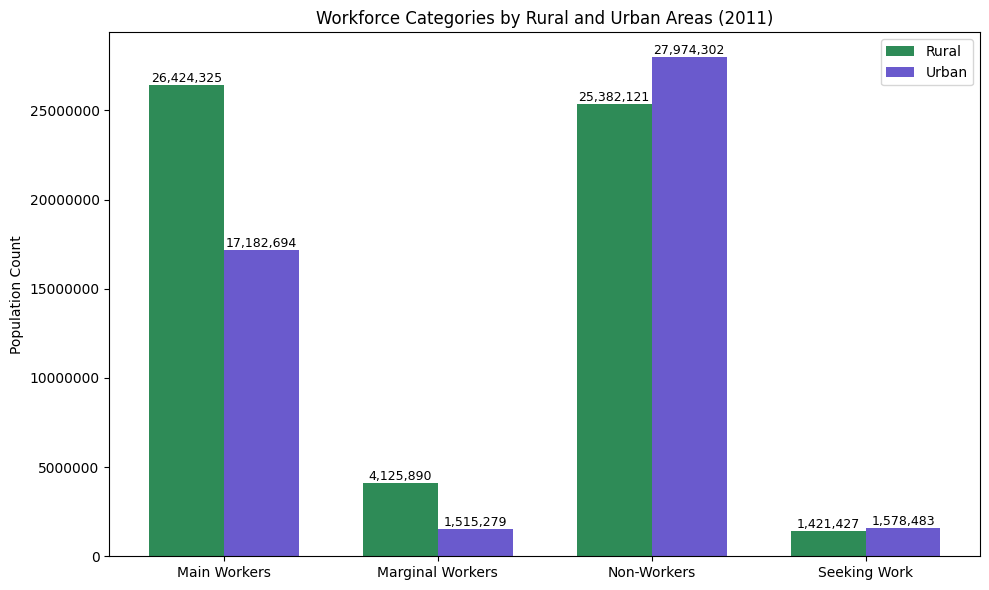

In [1086]:
# Get the LabelEncoder for Area_Name in 2011
le_area_11 = encoders['Total_Rural_Urban_11']

# Decode to find encoded values for 'Rural' and 'Urban'
rural_code = le_area_11.transform(['Rural'])[0]
urban_code = le_area_11.transform(['Urban'])[0]

# Define workforce categories
categories = ['Main Workers', 'Marginal Workers', 'Non-Workers', 'Seeking Work']

# Values for 2011 rural and urban using decoded label codes
rural = [
    age_workforce_11[age_workforce_11['Total_Rural_Urban'] == rural_code]['Main_Workers_Persons'].sum(),
    age_workforce_11[age_workforce_11['Total_Rural_Urban'] == rural_code]['Marginal_0_to_6_Persons'].sum(),
    age_workforce_11[age_workforce_11['Total_Rural_Urban'] == rural_code]['Non_Workers_Total_Persons'].sum(),
    age_workforce_11[age_workforce_11['Total_Rural_Urban'] == rural_code]['Non_Workers_Seeking_Persons'].sum()
]

urban = [
    age_workforce_11[age_workforce_11['Total_Rural_Urban'] == urban_code]['Main_Workers_Persons'].sum(),
    age_workforce_11[age_workforce_11['Total_Rural_Urban'] == urban_code]['Marginal_0_to_6_Persons'].sum(),
    age_workforce_11[age_workforce_11['Total_Rural_Urban'] == urban_code]['Non_Workers_Total_Persons'].sum(),
    age_workforce_11[age_workforce_11['Total_Rural_Urban'] == urban_code]['Non_Workers_Seeking_Persons'].sum()
]

# Plotting
x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))

bars_rural = ax.bar(x - width/2, rural, width, label='Rural', color='seagreen')
bars_urban = ax.bar(x + width/2, urban, width, label='Urban', color='slateblue')

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{int(height):,}', 
                ha='center', va='bottom', fontsize=9)

add_labels(bars_rural)
add_labels(bars_urban)

ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylabel('Population Count')
ax.set_title('Workforce Categories by Rural and Urban Areas (2011)')
ax.legend()

# Format Y-axis as plain numbers
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()


# Prediction of population

Let us see what the population of Maharashtra was for 2001 and 2011

In [1087]:
# For 1991
total_pop_1991 = age_workforce_01['Population_Persons'].astype(int).sum()
print(f"Total Population of Maharashtra (1991): {total_pop_1991:,}")

# For 2001
total_pop_2001 = age_workforce_01['Population_Persons'].astype(int).sum()
print(f"Total Population of Maharashtra (2001): {total_pop_2001:,}")

# For 2011
total_pop_2011 = age_workforce_11['Population_Persons'].astype(int).sum()
print(f"Total Population of Maharashtra (2011): {total_pop_2011:,}")


Total Population of Maharashtra (1991): 87,227,701
Total Population of Maharashtra (2001): 87,227,701
Total Population of Maharashtra (2011): 102,604,611


### Importing Libraries

In [1088]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [1089]:
# Independent variable (year)
X = np.array([[1991], [2001], [2011]])

# Dependent variable (total population)
y = np.array([total_pop_1991, total_pop_2001, total_pop_2011])

In [1090]:
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [1091]:
year_to_predict = np.array([[2025]])
predicted_population = model.predict(year_to_predict)

print(f"Predicted Population of Maharashtra in 2025: {int(predicted_population[0]):,}")

Predicted Population of Maharashtra in 2025: 110,805,629


In [1092]:
# Predict future years
future_years = np.array([[2021], [2031]])
predictions = model.predict(future_years)

# Print predicted values
for year, pop in zip(future_years.flatten(), predictions):
    print(f"Predicted Population for {year}: {int(pop):,}")

Predicted Population for 2021: 107,730,247
Predicted Population for 2031: 115,418,702


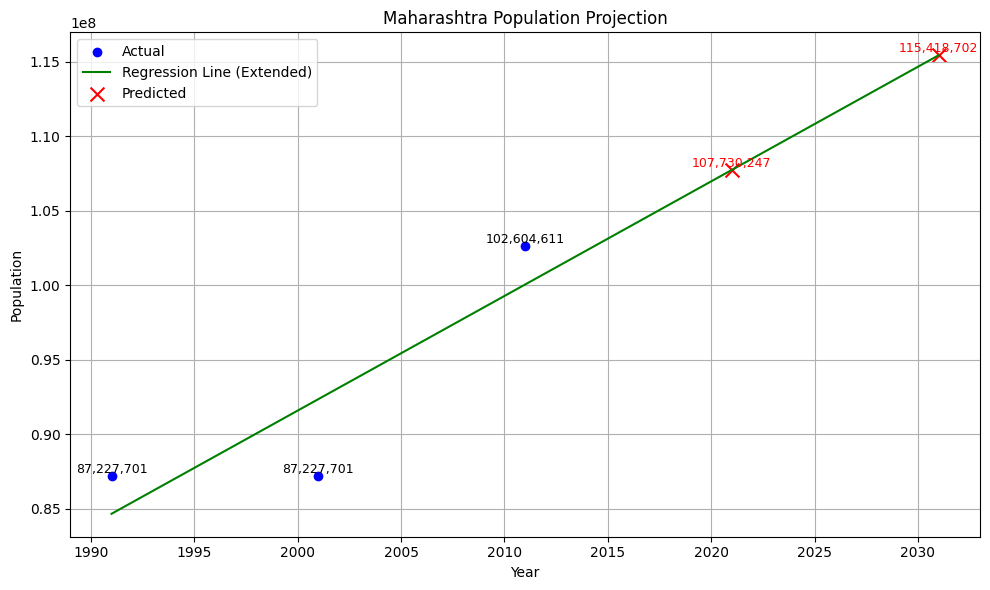

In [1093]:
plt.figure(figsize=(10, 6))

# Extended range for regression line (e.g., from 1991 to 2031)
x_range = np.linspace(1991, 2031, 100).reshape(-1, 1)
y_range = model.predict(x_range)

# Plot actual data
plt.scatter(X, y, color='blue', label='Actual')

# Plot regression line over full range
plt.plot(x_range, y_range, color='green', label='Regression Line (Extended)')

# Plot predictions
plt.scatter(future_years, predictions, color='red', marker='x', s=100, label='Predicted')

# Titles and labels
plt.title('Maharashtra Population Projection')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Add value labels
for i, txt in enumerate(y):
    plt.text(X[i], y[i], f'{txt:,}', fontsize=9, va='bottom', ha='center')
for i, txt in enumerate(predictions):
    plt.text(future_years[i], txt, f'{int(txt):,}', fontsize=9, va='bottom', ha='center', color='red')

plt.show()


In [1094]:
# Predict population for a specific year (e.g., 2026)
specific_year_1 = 2025
predicted_population_1 = model.predict(np.array([[specific_year_1]]))[0]

specific_year_2 = 2026
predicted_population_2 = model.predict(np.array([[specific_year_2]]))[0]

print(f"Predicted Population for {specific_year_1}: {int(predicted_population_1):,}")
print(f"Predicted Population for {specific_year_2}: {int(predicted_population_2):,}")

Predicted Population for 2025: 110,805,629
Predicted Population for 2026: 111,574,475
